# Bitcoin financial Analyisis

- Explore trends in halving cycles

### Bitcoin Price & Volume

In [1]:
import yfinance as yf
from datetime import date
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import numpy as np

### Load & clean data

In [2]:
data = pd.read_excel("Bitcoin_clean.xlsx")

data["Date"] = pd.to_datetime(data["Date"])
df = data.copy()
data.head()

,Date,Open,High,Low,Close,Vol,Change %
0,2023-09-10,25901.1,25995.1,25626.7,25840.2,23600.0,-0.0024
1,2023-09-09,25909.5,25938.5,25814.3,25901.1,13480.0,-0.0003
2,2023-09-08,26248.5,26415.4,25701.6,25909.5,41010.0,-0.0130
3,2023-09-07,25758.0,26417.7,25626.5,26249.8,39770.0,0.0191
4,2023-09-06,25790.1,26018.4,25411.7,25758.0,37780.0,-0.0013


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4803 non-null   datetime64[ns]
 1   Open      4803 non-null   float64       
 2   High      4803 non-null   float64       
 3   Low       4803 non-null   float64       
 4   Close     4803 non-null   float64       
 5   Vol       4797 non-null   float64       
 6   Change %  4803 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 262.8 KB


# Bitcoin price and halving cycles

In [4]:
halvings_dates = {
    "1st halving" : datetime.date(2012, 11, 28),
    "2nd halving" : datetime.date(2016, 7, 9), 
    "3rd halving" : datetime.date(2020, 5, 11),
    "4th halving" : datetime.date(2024, 4, 26)
    }

In [5]:
#plot
def plot_price(df_input):
    
    sns.set(style="darkgrid")

    fig, ax = plt.subplots(figsize = (16,6))

    #bitcoin price
    ax = sns.lineplot(data = df_input, x = "Date", y = "Close")

    #labelling
    ax.set_title("Bitcoin Price & Volume")
    ax.set(ylabel = "Close Price $ (log)")

    #log scale for price
    plt.yscale("log")
    ax.set_xlim([datetime.date(2009, 12, 31), datetime.date(2025, 1, 8)])
    ax.set_ylim(0.1, 1000000)
    #plt.xlim(right = datetime.date("2025-01-01"))
    #add halving date
    
    for d in halvings_dates.values():
        ax.axvline((d), color = "black", linestyle = "--", label = f'{d}')
    
    plt.legend()
    
    arrow_properties = dict(arrowstyle='<->', linewidth=2, color='red')
    
    
    ax.annotate(text = str(halvings_dates["2nd halving"] - halvings_dates["1st halving"])[:9],
                xy = (halvings_dates["1st halving"], 8000),
                xytext = (halvings_dates["2nd halving"], 8000),
                arrowprops=arrow_properties
                )
    
    ax.annotate(text = str(halvings_dates["3rd halving"] - halvings_dates["2nd halving"])[:9],
                xy = (halvings_dates["2nd halving"], 70000),
                xytext = (halvings_dates["3rd halving"], 70000), 
                arrowprops=arrow_properties
                )
    
    ax.annotate(text = str(halvings_dates["4th halving"] - halvings_dates["3rd halving"])[:9],
                xy = (halvings_dates["3rd halving"], 300000),
                xytext = (halvings_dates["4th halving"], 300000), 
                arrowprops=arrow_properties
            )
    plt.show()

Exploring Bitcoin's Price and length of cycles (between halvings), 

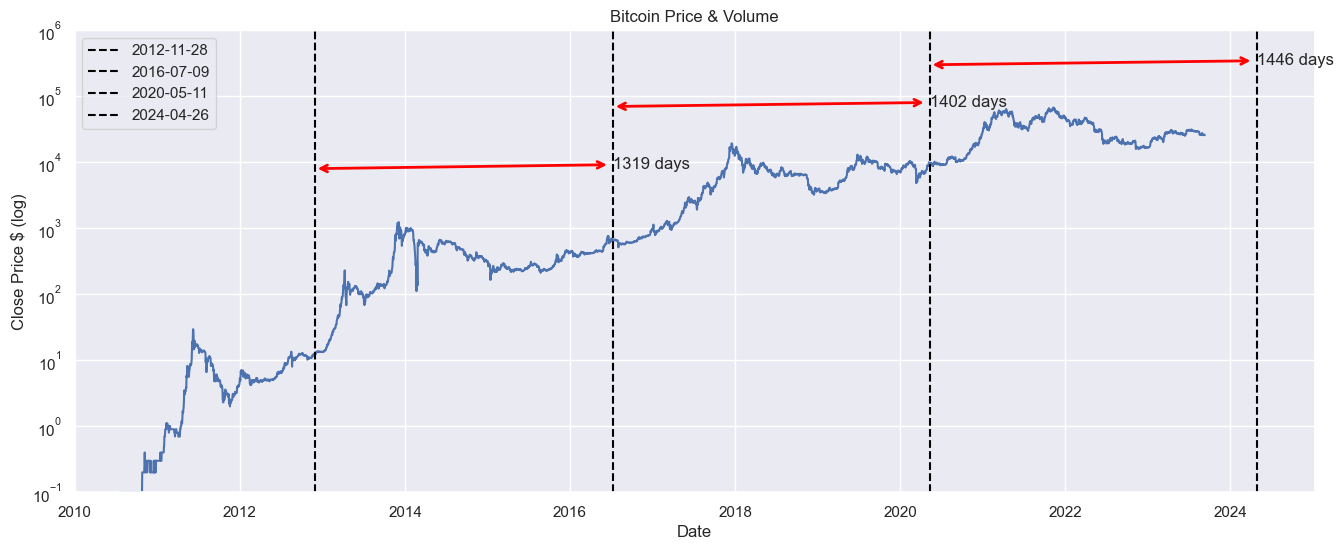

In [6]:
plot_price(df)

# Yearly and monthly returns

In [7]:
#take the row for the last day of each year
yearly_price = pd.DataFrame(df.groupby(df["Date"].dt.year)["Close"].first()).reset_index()
yearly_price = yearly_price.rename(columns = {"Date" : "Year"})

#calculate the year price diiference
yearly_price["prior_year"] = yearly_price["Close"].shift(1)
yearly_price["yearly_diff"] = yearly_price["Close"].diff(1)
yearly_price["yearly_diff_perc"] = yearly_price["yearly_diff"]/yearly_price["prior_year"] *100

#plot
def yearly_bar_plot(df):
    sns.set(style = "darkgrid")
    fig = go.Figure(go.Waterfall(
        name = "Bitcoin Yearly Price changes", 
        orientation = "v", 
        x = df["Year"], 
        y = df["yearly_diff_perc"]
    ))
    fig.update_yaxes(range=[0, 12000])
    
    fig.update_layout(
        title = "Yearly price percentage difference", 
        yaxis_title = "Price $ (Log)"
    )
    fig.show()
    

Yearly returns

In [8]:
yearly_bar_plot(yearly_price)

Monthly returns

In [9]:
monthly_price = df.copy()

monthly_price["Year"] = monthly_price["Date"].dt.year
monthly_price["Month"] = monthly_price["Date"].dt.month

monthly_price_grouped = pd.DataFrame(monthly_price.groupby(["Year", "Month"])["Close"].first()).reset_index()
monthly_price_grouped.sort_values(by = ["Year", "Month"], inplace = True)
monthly_price_grouped["pct_change"] = monthly_price_grouped["Close"].pct_change().round(2)

monthly_gains = monthly_price_grouped.copy()
monthly_gains_pivot = monthly_gains.pivot_table(index = "Year", columns = "Month", values = "pct_change")
monthly_gains_pivot.sort_values(by = "Year", ascending= False, inplace=True)
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
monthly_gains_pivot.rename(columns=month_mapping, inplace=True)

In [13]:
monthly_gains_pivot.style.background_gradient(cmap = 'RdYlGn')

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2023,0.400000,0.000000,0.230000,0.030000,-0.070000,0.120000,-0.040000,-0.110000,0.000000,nan,nan,nan
2022,-0.170000,0.120000,0.050000,-0.170000,-0.160000,-0.370000,0.170000,-0.140000,-0.030000,0.060000,-0.160000,-0.040000
2021,0.140000,0.360000,0.300000,-0.020000,-0.350000,-0.060000,0.190000,0.130000,-0.070000,0.400000,-0.070000,-0.190000
2020,0.300000,-0.090000,-0.250000,0.350000,0.100000,-0.030000,0.240000,0.030000,-0.070000,0.280000,0.430000,0.470000
2019,-0.070000,0.110000,0.070000,0.300000,0.610000,0.260000,-0.070000,-0.050000,-0.140000,0.100000,-0.180000,-0.050000
2018,-0.260000,0.010000,-0.330000,0.330000,-0.190000,-0.150000,0.210000,-0.090000,-0.060000,-0.040000,-0.370000,-0.080000
2017,0.000000,0.230000,-0.090000,0.250000,0.700000,0.080000,0.160000,0.640000,-0.080000,0.480000,0.540000,0.390000
2016,-0.140000,0.180000,-0.050000,0.080000,0.180000,0.270000,-0.070000,-0.080000,0.060000,0.150000,0.060000,0.300000
2015,-0.310000,0.160000,-0.040000,-0.030000,-0.030000,0.150000,0.070000,-0.190000,0.030000,0.320000,0.210000,0.140000


# Price from halving

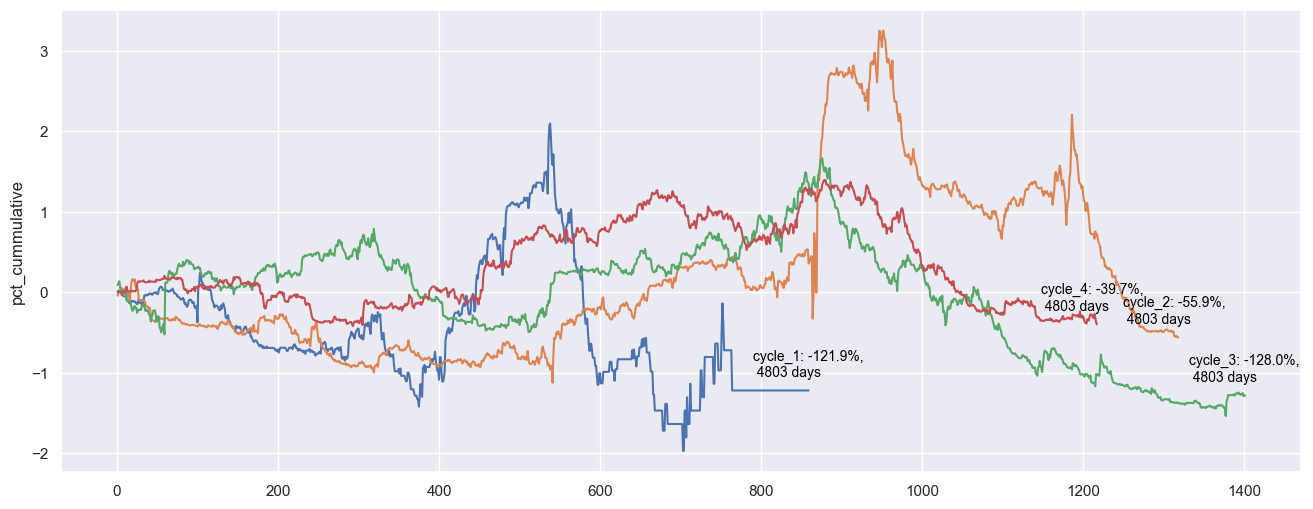

In [44]:
cycles = {
"cycle_1" : df[(df["Date"] >= "2010-07-22") & (df["Date"] < "2012-11-28")].reset_index().drop(columns = ["index"]),
"cycle_2" : df[(df["Date"] >= "2012-11-28") & (df["Date"] < "2016-07-09")].reset_index().drop(columns = ["index"]),
"cycle_3" : df[(df["Date"] >= "2016-07-09") & (df["Date"] < "2020-05-11")].reset_index().drop(columns = ["index"]),
"cycle_4" : df[(df["Date"] >= "2020-05-11") & (df["Date"] < "2024-04-26")].reset_index().drop(columns = ["index"])
}


legend_labels = []

for k, v in cycles.items():
    cycles[k]["pct"] = cycles[k]["Close"].pct_change()
    cycles[k]["pct_cummulative"] = cycles[k]["pct"].cumsum()
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize = (16,6))
for k, v in cycles.items():
    ax = sns.lineplot(data = v, x = v.index, y = "pct_cummulative", legend = "auto")
    #plt.yscale("log")
    legend_labels.append(k)
    
    last_pct = v["pct_cummulative"].iloc[-1]
    
    ax.annotate(f'{k}: {last_pct:.1%}, \n {len(df["Date"])} days', 
                xy=(v.index[-1], last_pct),
                xytext=(-40, 10),
                textcoords='offset points',
                fontsize=10,
                color='black'
               )
#ax.legend(legend_labels, loc="upper left")

# Close price - log scale

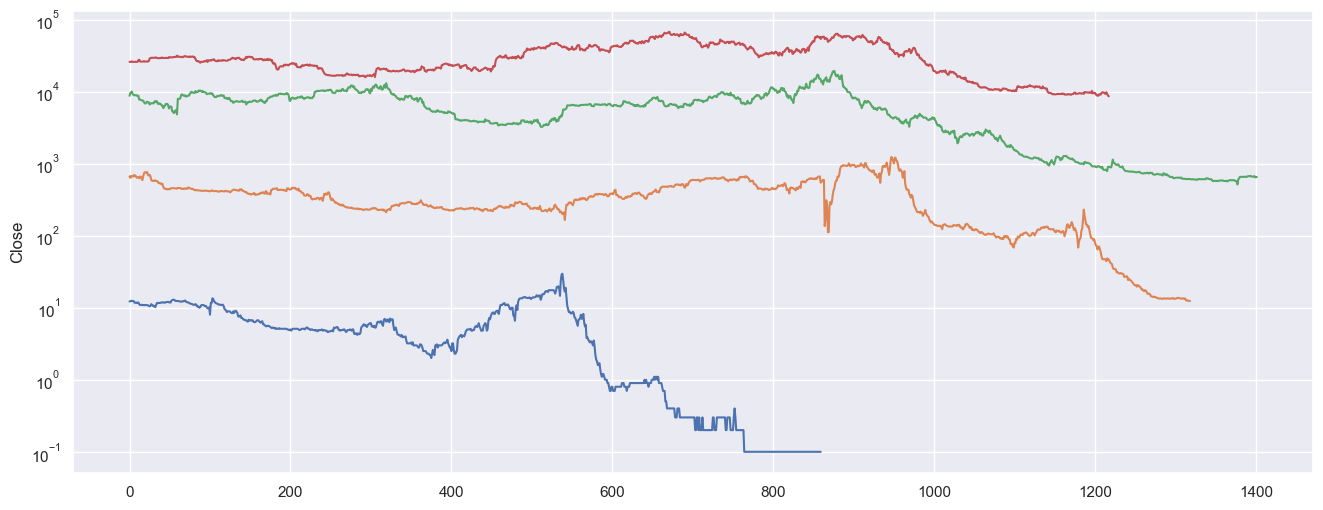

In [45]:
legend_labels = []
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize = (16,6))
for k, v in cycles.items():
    ax = sns.lineplot(data = v, x = v.index, y = "Close")
    plt.yscale("log")